## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [3]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

## 개별 종목의 일별 시세 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [4]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'
# 2017년도부터 불러오기
df=fdr.DataReader('005930',"2017")
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2021-12-07,76100,77700,75600,77400,19232453,0.014417
2021-12-08,78300,78600,77100,77400,21558340,0.000000
2021-12-09,77400,78200,77000,78200,21604528,0.010336


<AxesSubplot:xlabel='Date'>

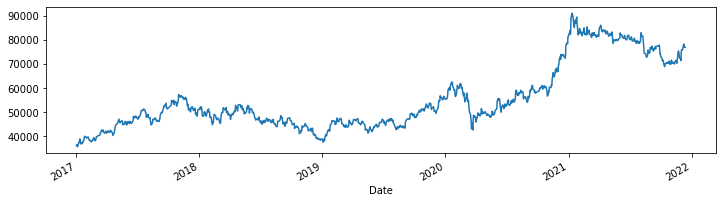

In [5]:
# 종가 시각화 하기
df["Close"].plot(figsize=(12,3))

## 상장종목 목록 가져오기

In [6]:
# 6-1에서 저장해 놓았던 csv 파일로 분석
# 없다면 아래에서 재로드
# df_krx = fdr.StockListing('KRX')
df_krx=pd.read_csv("krx.csv")
df_krx.shape

(6379, 10)

## 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [7]:
# DataFrame 에 어떤 데이터가 들어있는지 head()로 확인
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [9]:
# df_krx의 Name column 에서 '하이브'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['하이브'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져옴.
# 하이브 (series) -> ['하이브'] (list) -> '하이브' (string)
#df_krx.loc[df_krx["Name"]=="하이브", "Symbol"]
df_krx[df_krx["Name"]=="하이브"]["Symbol"]

5198    352820
Name: Symbol, dtype: object

In [10]:
df_krx.loc[df_krx["Name"]=="하이브", "Symbol"].tolist()[0]

'352820'

In [11]:
# '히트'라는 이름을 가진 상장사가 있는지 확인해 보기
df_krx.loc[df_krx["Name"]=="히트", "Symbol"]

Series([], Name: Symbol, dtype: object)

## 종목명으로 종목 코드를 받아오는 함수 만들기

In [12]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.

def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    sym = df_krx.loc[df_krx["Name"]==item_name, "Symbol"].tolist()
    item_code = False
    if len(sym) > 0:
        item_code = sym[0]
    return item_code

In [13]:
item_name = "하이브"
item_code_by_item_name(item_name)

'352820'

In [14]:
# 네이버로 등록된 상장사는 없음
# 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인
item_name = "네이버"
item_code_by_item_name(item_name)

False

In [15]:
# 네이버는 NAVER로 등록되어 있습니다.
item_name = "NAVER"
item_code_by_item_name(item_name)

'035420'

In [16]:
# 삼성전자
item_name = "삼성전자"
item_code_by_item_name(item_name)

'005930'

In [17]:
# 셀트리온과 카카오게임즈도 확인
item_name = "셀트리온"
item_code_by_item_name(item_name)

'068270'

In [18]:
item_name = "카카오게임즈"
item_code_by_item_name(item_name)

'293490'

In [19]:
fdr.DataReader(item_code_by_item_name(item_name)).tail(1)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-12-13,91000,91600,89200,90200,859325,-0.008791


## 종목명으로 일별시세를 받아오는 함수 만들기

In [20]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    df_day = fdr.DataReader(item_code_by_item_name(item_name), str(year))
    return df_day


In [21]:
find_item_list("삼성전자", year=2021)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2021-12-07,76100,77700,75600,77400,19232453,0.014417
2021-12-08,78300,78600,77100,77400,21558340,0.000000
2021-12-09,77400,78200,77000,78200,21604528,0.010336


### 종목명으로 일별 시세를 잘 가져오는지 확인하기

In [22]:
# LG화학의 데이터
find_item_list("LG화학", year=2021)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,849000,900000,835000,889000,858451,0.078883
2021-01-05,891000,893000,875000,893000,371709,0.004499
2021-01-06,908000,912000,883000,890000,513628,-0.003359
2021-01-07,910000,969000,896000,962000,706912,0.080899
2021-01-08,989000,1016000,970000,999000,924780,0.038462
...,...,...,...,...,...,...
2021-12-07,720000,726000,708000,711000,173785,-0.008368
2021-12-08,719000,754000,718000,751000,463760,0.056259
2021-12-09,759000,764000,745000,747000,371186,-0.005326


In [23]:
# 빅히트의 데이터를 가져옵니다.
# stock_daily 변수에 담습니다.
find_item_list("하이브", year=2021)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,158400,158895,154440,156420,152926,-0.012500
2021-01-05,155430,157410,153945,156915,168962,0.003165
2021-01-06,158400,159390,155925,156915,148194,0.000000
2021-01-07,156915,157905,155430,155430,139860,-0.009464
2021-01-08,156420,160380,153450,158895,285332,0.022293
...,...,...,...,...,...,...
2021-12-07,340000,344500,336000,339500,215082,0.013433
2021-12-08,344000,348500,337500,341000,392299,0.004418
2021-12-09,345500,361000,344500,354500,541135,0.039589


## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

In [25]:
# stock_daily 변수에 할당된 수집된 데이터의 종가 그래프
stock_daily = find_item_list("대한항공", year=2021)

<AxesSubplot:xlabel='Date'>

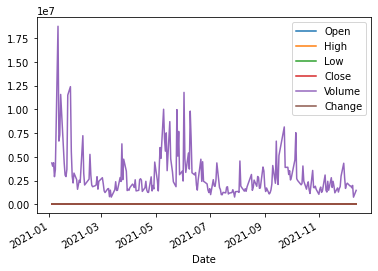

In [26]:
# 전체 데이터프레임을 plot() 으로 시각화 하면 수치 데이터 전체를 선그래프로
stock_daily.plot()

### 서브플롯 그리기

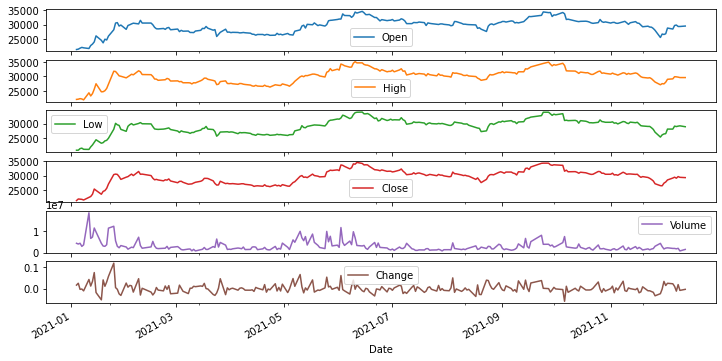

In [27]:
# 수집한 종목의 선그래프를 Pandas 로
# 스케일이 다르기 때문에 subplots를 사용
import matplotlib.pyplot as plt
stock_daily.plot(subplots=True, figsize=(12,6))
plt.show()

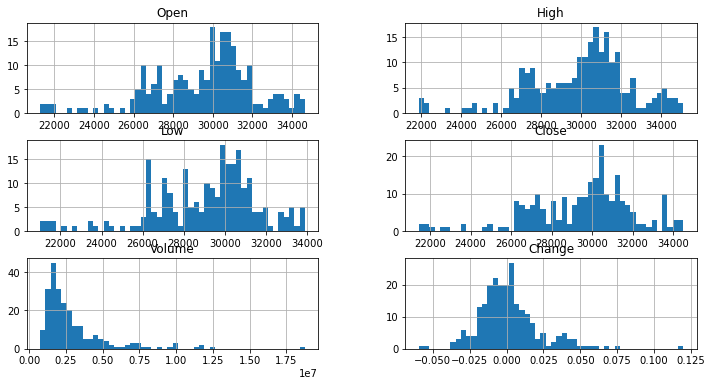

In [28]:
# 히스토그램 그리기
_=stock_daily.hist(bins=50,figsize=(12,6))

### 2축 그래프 그리기

<AxesSubplot:xlabel='Date'>

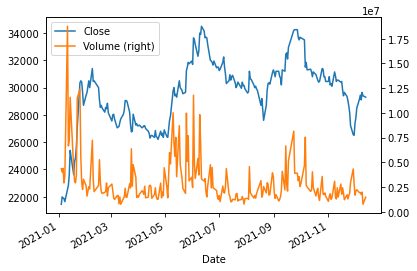

In [29]:
# secondary_y 옵션을 통한 종가close와 거래량volume에 대한 2축 그래프 그리기
# 1e7 = 7승
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume")

In [30]:
1e7

10000000.0